In [1]:
from tensorflow.compat.v1 import ConfigProto, Session
from tensorflow.compat.v1.keras.backend import set_session

config = ConfigProto()
config.gpu_options.allow_growth =True
session = Session(config=config)
set_session(session)

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

True

## Classification with CIFAR-10 in tf.keras


10개의 label로 이루어진 이미지 데이터

<img src="image/SIFAR10.png" width="500" >

### Import the CIFAR-10 dataset

* 프로그램을 구동시키기 위한 패키지와 모듈들을 가져옵니다.

In [2]:
# 텐서플로우 패키지
import tensorflow as tf
# 랜덤모듈(랜덤으로 사진 확인 시 사용) 
import random 
# 배열을 다루기 위한 모듈
import numpy as np  
# 차트, 그래프, 그림 등을 표시하기 위한 모듈
import matplotlib.pyplot as plt 

* 케라스로 CIFAR-10 데이터 가져옵니다.

In [3]:
#x_train와 x_test에 각 50000개의 사진(32x32x3)
#y_train, y_test에 각 10000개의 정답 값

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 


print("x_train shape : ", x_train.shape, "y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape, "y_test shape : ", y_test.shape)

x_train shape :  (50000, 32, 32, 3) y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3) y_test shape :  (10000, 1)



</br>

### Data Visualize

**0**:airplane, **1**:automobile, **2**:bird, **3**:cat, **4**:deer, **5**:dog, **6**:frog, **7**:horse, **8**:ship, **9**:truck

* 0~9까지의 label값에 대응하는 list를 만들어줍니다.

In [4]:
cifar10_labels = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

* 값이 잘 대응되는지 10개 값만 확인해봅니다.

In [5]:
for i in y_train.reshape(50000)[:10]:
    print(i,cifar10_labels[i])

6 frog
9 truck
9 truck
4 deer
1 automobile
1 automobile
2 bird
7 horse
8 ship
3 cat


* 사진도 잘 나오는지 확인합니다.

y= 7 | horse


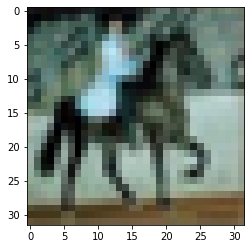

In [6]:
#0부터 49999까지 수 중에 하나 랜덤으로 추출
img_index = random.randint(0,x_train.shape[0]-1)

# 해당 데이터의 index 추출
label_index = y_train[img_index][0]

# matplotlib를 활용하여 그림 표출
print("y=", str(label_index), "|", cifar10_labels[label_index])
plt.imshow(x_train[img_index])



</br>

### Data Normalization

- 학습 능력 향상을 위해서 데이터 정규화를 수행

<img src="image/datanormal.jfif">


* RGB 색은 0부터 255의 값을 가집니다. 이 값을 모두 0부터 1 사이의 값으로 정규화해줍니다.

In [7]:
# fitting data in similar scale    0~1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
print("Number of train data : ", len(x_train))
print("Number of test data : ", len(x_test))

Number of train data :  50000
Number of test data :  10000




</br>

### 데이터를 Train/ Validation/ Test data 셋으로 나눠줍니다.
Train data : data for training model </br>

Validation data : data for hyperparameter tuning and validation </br>

Test data : after all validation and training, at the last test 

In [9]:
# split train | validation
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

45000 train set
5000 validation set
10000 test set


#### on hot encoding
<img src="image/onehot.png" >

In [10]:
# one-hot encoding in label
# only one dimension get value 1 and other dimension value 0 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape: ", x_train.shape )
print("y_train shape: ", y_train.shape )

x_train shape:  (45000, 32, 32, 3)
y_train shape:  (45000, 10)



</br>


### Modeling 
Convolution Layer → Conv2D() </br>

Pooling Layer → MaxPooling2D() </br>

**Dropout Layer** → Dropout()

Fully connected Layer → Flatten(),Dense()



* Dropout은 모델의 과적합을 막기위한 하나의 방법으로 학습시 랜덤하게 신경망의 일부 연결을 끊어줍니다.

<img src="image/dropout.png">

* 케라스 순차형 모델을 사용하여 CNN 모델을 쌓아보겠습니다. </br>

순차형 모델은 디자인한 Layer를 한층한층씩 쌓아서 모델을 만들어나갑니다.

<img src="image/sequential.png" width="200" >

#Convolution Layer 

→ Conv2D(filters: 필터의 개수, kernel_size: 필터의 크기, padding: 패딩 유무(valid=패딩없음), activation: 활성함수, strides: 스트라이드 (1,1))

#Pooling Layer → MaxPooling2D()

#Dropout Layer → Dropout()

#Fully connected Layer → Flatten(),Dense()

In [11]:
#케라스 순차형 모델
model = tf.keras.Sequential()

#padding을 'same'으로 설정하면 stride는 자동으로 설정 됨
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))#32x32x64
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#16x16x64
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))#16x16x32
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#8x8x32
model.add(tf.keras.layers.Dropout(0.3))

In [12]:
model.add(tf.keras.layers.Flatten()) #fully connected layer 1*2048 

model.add(tf.keras.layers.Dense(256, activation='relu')) #1*256
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(10, activation='softmax')) #1*10

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

* softmax 함수는 입력 값들을 각 클래스별 확률로 변환해줍니다.

<img src="image/softmax.jpg" width="400">

### 본인만의 모델을 설계해 보세요 ^^

- 첫 번째 conv2D 층의 경우 input_shape (32,32,3)을 꼭 지정해주세요
- [Conv2d] 층의 경우 filter와 kernel_size만 수정해서 추가

- [MaxPooling2D] 층의 경우 2로만 5개 층 이하로 사용

- [Dropout] 층의 경우 웬만하면 0.5 이하로 추가

- [Flatten] 층의 경우 Dense 층 전에 넣어주기

- [Dense] 층의 경우 맨마지막 10이 되도록
--------------------------------------------------------------

- keras layer에 대한 보충 설명 참고자료
- https://keras.io/ko/layers/convolutional/
- https://zereight.tistory.com/227
- https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

In [14]:


model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(filters=50, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten()) #fully connected layer

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        147520    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)         


</br>

### Model Compile
학습 프로세스 구성</br>
optimizer, loss function, metrics 

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics = ['accuracy']) # 평가 기준 

* learning rate의 경우 너무 크게 주면 안됩니다.
<img src="image/learn.jpg" width="500">



</br>

### Model Training
ModelCheckpoint API로 epoch마다 모델 저장 

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 1, save_best_only=True) # verbose 1 : seeing progress 

model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid,y_valid),
         callbacks=[checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
44928/45000 [============================>.] - ETA: 0s - loss: 1.9675 - acc: 0.2423
Epoch 00001: val_loss improved from inf to 1.73268, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 12s 258us/sample - loss: 1.9675 - acc: 0.2423 - val_loss: 1.7327 - val_acc: 0.3478
Epoch 2/10
44992/45000 [============================>.] - ETA: 0s - loss: 1.6775 - acc: 0.3600
Epoch 00002: val_loss improved from 1.73268 to 1.48742, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 8s 177us/sample - loss: 1.6775 - acc: 0.3600 - val_loss: 1.4874 - val_acc: 0.4338
Epoch 3/10
44736/45000 [============================>.] - ETA: 0s - loss: 1.5655 - acc: 0.4099
Epoch 00003: val_loss improved from 1.48742 to 1.40487, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 8s 176us/sample - loss: 1.5653 - acc: 0.4100 - val_loss: 1.4049 - val_acc: 0

<img src="image/batch.png" width="600">

### Model Test

In [17]:
# get the best valid weight
model.load_weights('model.weights.best.hdf5') 


# Test Accuracy
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Accuracy: ", score[1])  # [0] : test loss, [1] : accuracy

10000/10000 [==============================] - 1s 96us/sample - loss: 1.1169 - acc: 0.5988
Test Accuracy:  0.5988




</br>

### Visualize Prediction

#### np.random.choice(a, size=None, replace=True, p=None)
- a : 데이터를 넣어주면 된다. 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
- size : 정수. 샘플 숫자 shape으로 넣으면 매트릭스를 생성
- replace : 중복의 허용 여부. 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
- p : 배열. 각 데이터가 선택될 수 있는 확률

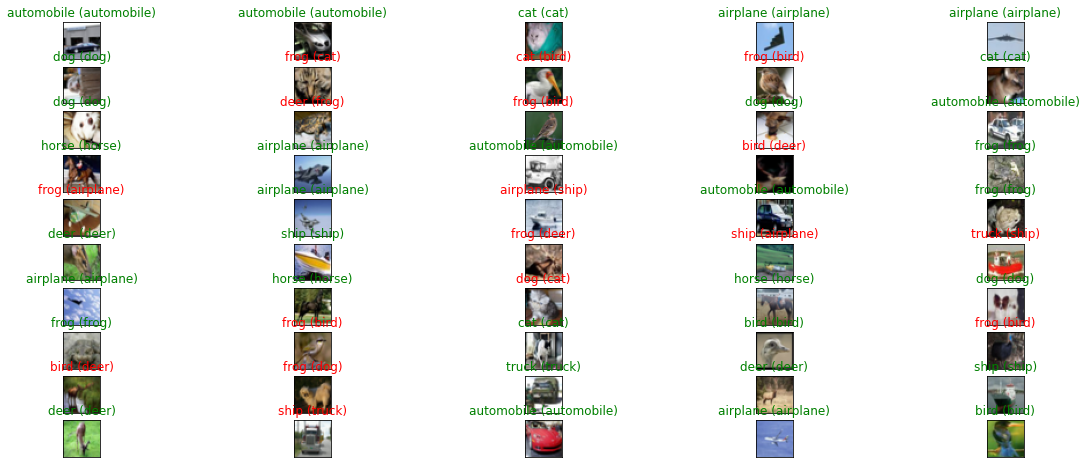

In [30]:
y_hat = model.predict(x_test) #[0.1, 0.1, 0.2, 0.05, 0.05, 0.5]

figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=50, replace=False)):
    axis = figure.add_subplot(10,5, i+1, xticks=[], yticks=[])
    axis.imshow(x_test[index])
    predict_index = np.argmax(y_hat[index]) #[0.1, 0.1, 0.2, 0.05, 0.05, 0.5] → 4
    true_index = np.argmax(y_test[index])
    
    axis.set_title("{} ({})".format(cifar10_labels[predict_index],
                                   cifar10_labels[true_index]),
                                   color = ("green" if predict_index == true_index else "red"))

- matplotlib.figure 참고
- https://m.blog.naver.com/PostView.nhn?blogId=jung2381187&logNo=220408468960&proxyReferer=https%3A%2F%2Fwww.google.com%2F